<a href="https://colab.research.google.com/github/Rasna-k/flight-price-prediction/blob/main/flightpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [ ]:
import pandas as pd

In [ ]:
fdf=pd.read_csv('https://raw.githubusercontent.com/Rasna-k/flightprice/main/flight_dataset.csv?token=GHSAT0AAAAAACDVJFLQAA67H4XG7BWPYX2KZFAK3AA')

# Pre Processing data

In [ ]:
#accessing first 10 rows of dataset
fdf.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [ ]:
#accessing whole dataset
fdf

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
#finding the size of the dataframe -no. of columns,no.of rows
fdf.shape

(300153, 12)

Therefore,there are 300153 rows and 12 columns in the dataset

In [ ]:
#getting the general information of the datasets
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
#getting the mathematical information about the dataset column wise
fdf.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
#deleting the first column as it is not used
fdf.drop(columns='Unnamed: 0', inplace=True)
fdf

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
#find out all the column names
fdf.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
#finding out the datatypes of all columns
fdf.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

Checking of any null values or duplicated rows

In [ ]:
fdf.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
#see if any duplicates
fdf.duplicated().sum()

0

THere are no duplicates and no null values

# Analyzing data

In [ ]:
fdf.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

***so,there are 5 airlines***

In [ ]:
fdf['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

***there are 2 types of classes i.e Economy and Business***

In [ ]:
fdf.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [ ]:
fdf.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

***there are 5 source and destination cities***

In [ ]:
fdf.flight.unique().shape

(1561,)

***There are 1561 unique flight numbers.***

In [ ]:
fdf.stops.unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

***There are 3 entries under stops columns-zero,one,two_or_more.***

In [ ]:
fdf.arrival_time.unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [ ]:
fdf.select_dtypes(include='number').columns

Index(['duration', 'days_left', 'price'], dtype='object')

In [ ]:
fdf.select_dtypes(include='object').columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

# Visualizing data

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

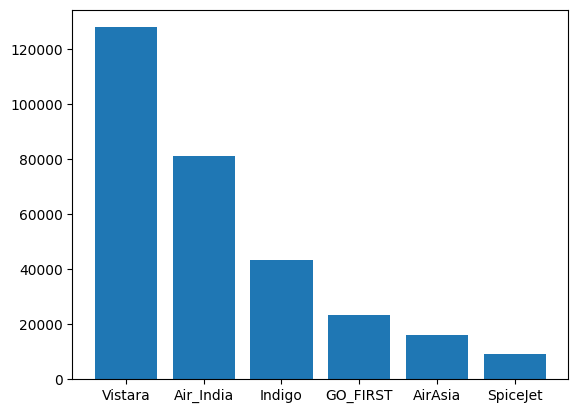

In [ ]:
plt.bar(fdf['airline'].value_counts().index,fdf['airline'].value_counts().values)

([<matplotlib.patches.Wedge at 0x7ff238738040>,
 [Text(0.8809535489223089, 0.6587266843245301, 'Delhi'),
  Text(-0.3779004059372413, 1.0330495066512875, 'Mumbai'),
  Text(-1.0992131326110681, 0.04159914777206989, 'Bangalore'),
  Text(-0.6015577367721227, -0.9209388086781889, 'Kolkata'),
  Text(0.36016745105880016, -1.0393649056985748, 'Hyderabad'),
  Text(1.0109871514258975, -0.43348007987882137, 'Chennai')],
 [Text(0.4805201175939866, 0.35930546417701636, '20.4%'),
  Text(-0.20612749414758613, 0.5634815490825203, '20.3%'),
  Text(-0.5995707996060371, 0.02269044423931085, '17.3%'),
  Text(-0.32812240187570324, -0.5023302592790121, '15.4%'),
  Text(0.19645497330480005, -0.5669263121992225, '13.6%'),
  Text(0.5514475371413986, -0.23644367993390253, '12.9%')])

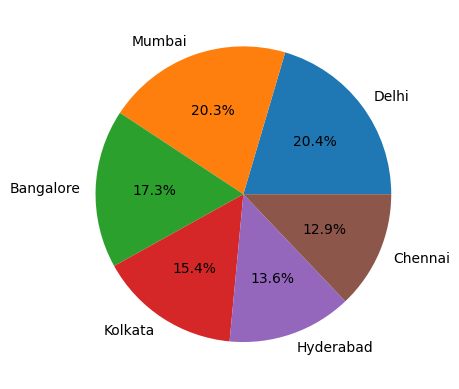

In [ ]:
plt.pie(fdf['source_city'].value_counts().values,labels=fdf['source_city'].value_counts().index,autopct='%1.1f%%')

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff232a11ab0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff232a12dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff232a11ff0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff232a13130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff232a13400>],
 'means': []}

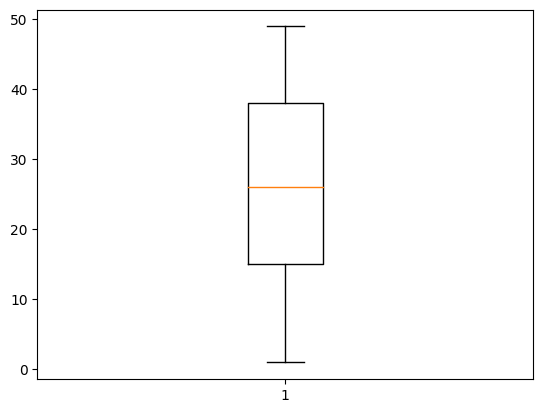

In [ ]:
plt.boxplot(fdf.days_left)

In [ ]:
import seaborn as sns

<Axes: xlabel='duration'>

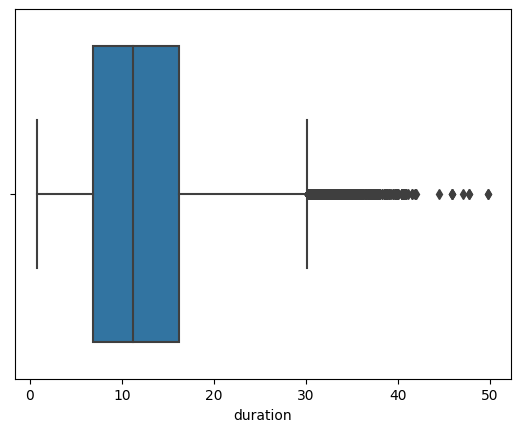

In [ ]:
sns.boxplot(fdf,x='duration')

<Axes: xlabel='airline', ylabel='price'>

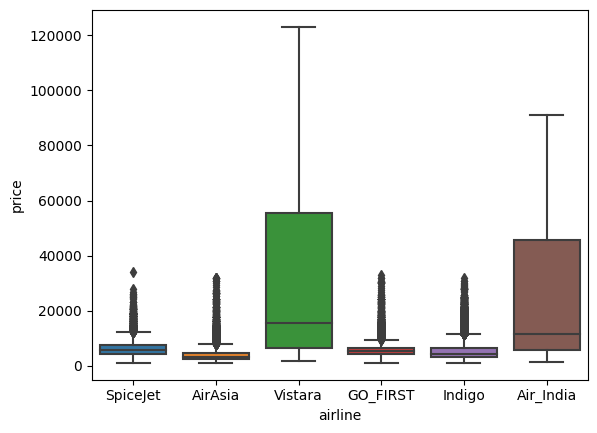

In [ ]:
sns.boxplot(fdf,x='airline',y='price')

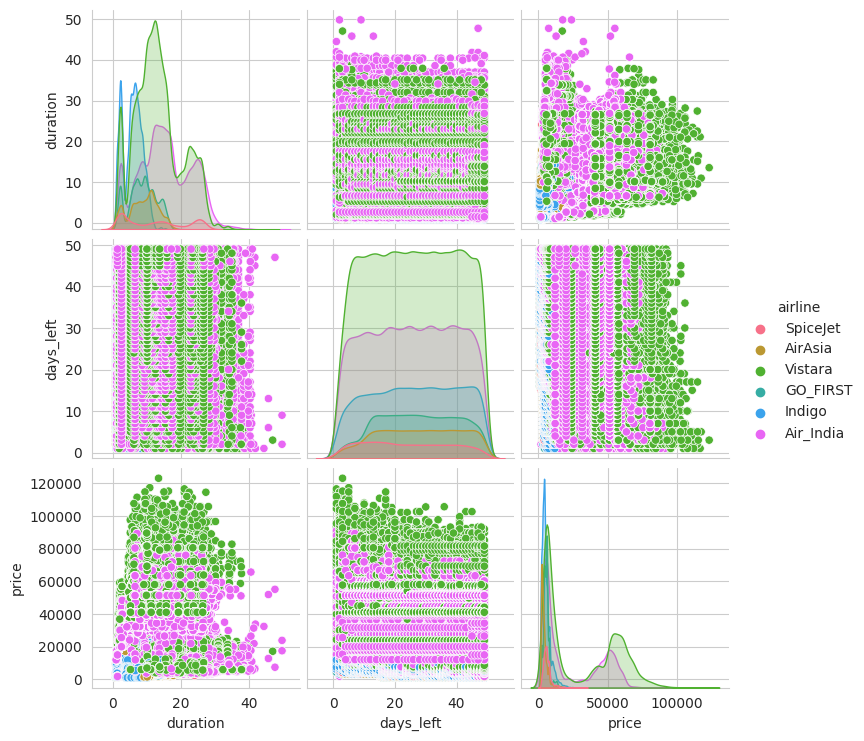

In [ ]:
sns.pairplot(fdf,hue='airline',palette='husl')

<ipython-input-48-35170990a2ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fdf.corr(),annot=True)


<Axes: >

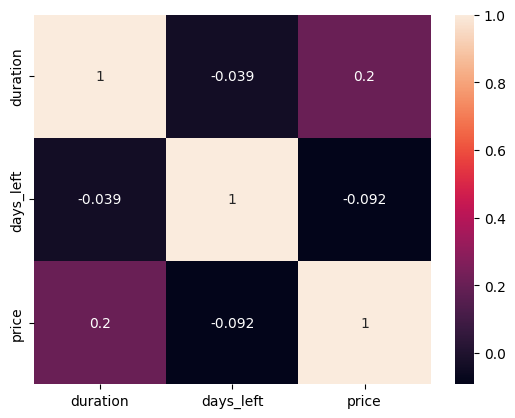

In [ ]:
sns.heatmap(fdf.corr(),annot=True)

In [ ]:
x=fdf[:-1]
y=fdf.iloc[:,-1]

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

ValueError: ignored

# Questions

**does price vary with airline ?**

<BarContainer object of 300153 artists>

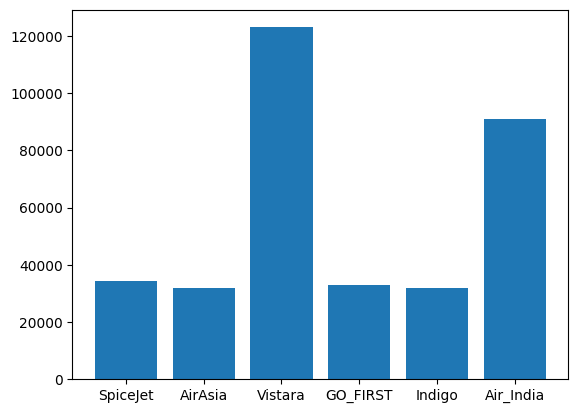

In [ ]:
plt.bar(fdf.airline,fdf.price)

**How is the price affected when tickets are bought in just 1 or 2 days before departure?**

<Axes: xlabel='days_left', ylabel='price'>

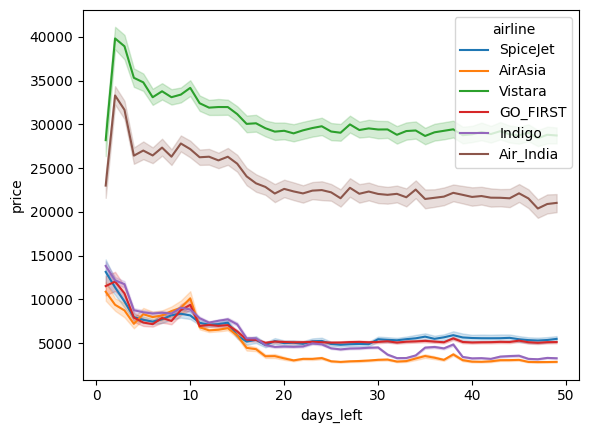

In [ ]:
sns.lineplot(fdf,x=fdf.days_left,y=fdf.price,hue='airline')

from the graph we come to know that , when days left are 1 or 2 :

*   The price gets higher for most of the airlines except for Vistara and Air India
*   for Vistara and Air India , the price gets lower in the last days.



**Does ticket price change based on the departure time and arrival time?**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Early_Morning'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Evening'),
  Text(4, 0, 'Night'),
  Text(5, 0, 'Late_Night')])

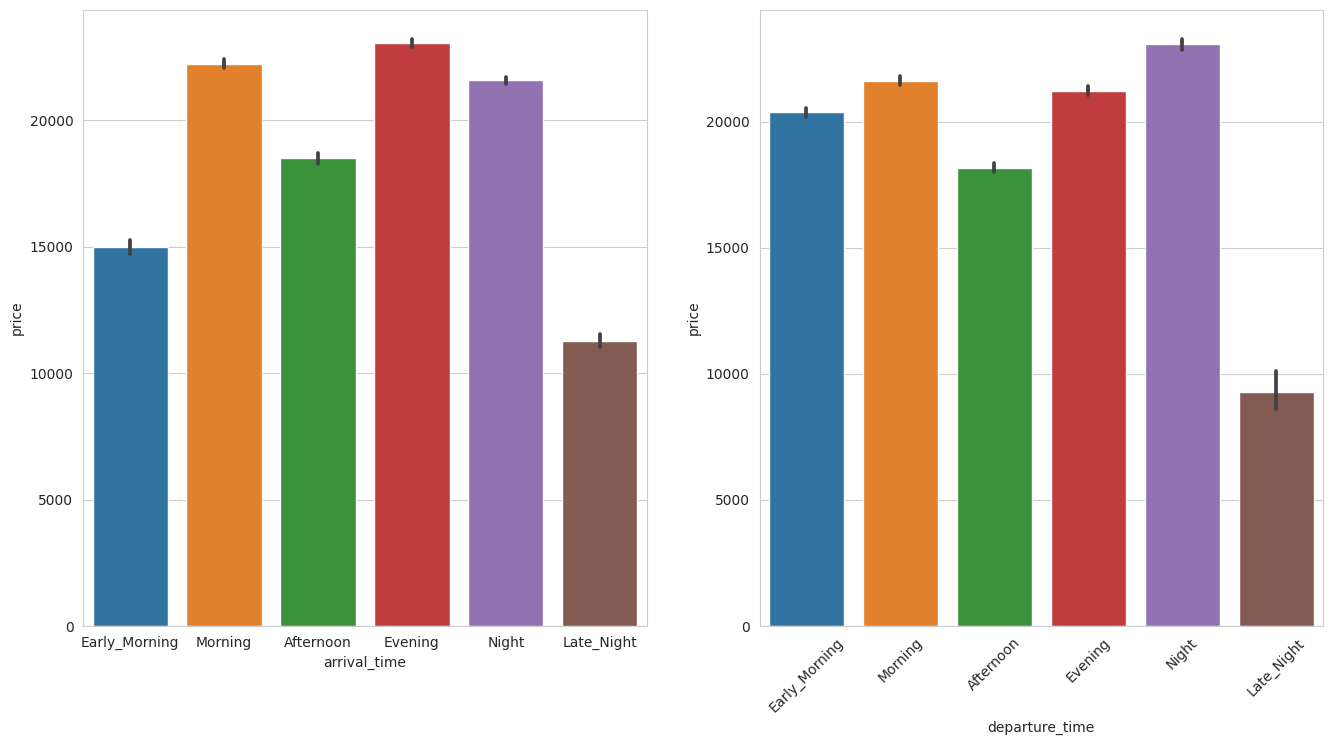

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.barplot(fdf,x='arrival_time',y='price',order=['Early_Morning','Morning','Afternoon','Evening',"Night",'Late_Night'])
plt.subplot(1,2,2)
sns.barplot(fdf,x='departure_time',y='price',order=['Early_Morning','Morning','Afternoon','Evening',"Night",'Late_Night'])
plt.xticks(rotation=45)

As we can see from the charts :
*  flights departing or arriving in late night tend to be cheaper than others.








<Axes: xlabel='price', ylabel='Density'>

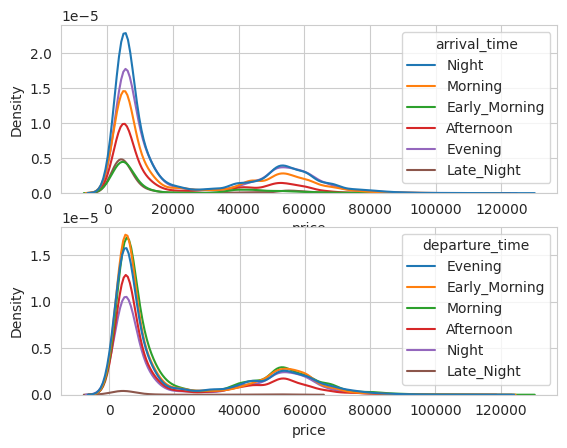

In [ ]:
plt.figure()
sns.set_style('whitegrid')
plt.subplot(2,1,1)
sns.kdeplot(fdf,x='price',hue='arrival_time')
plt.subplot(2,1,2)
sns.kdeplot(fdf,x='price',hue='departure_time')

**How the price changes with change in Source and Destination?**

<Axes: xlabel='destination_city', ylabel='price'>

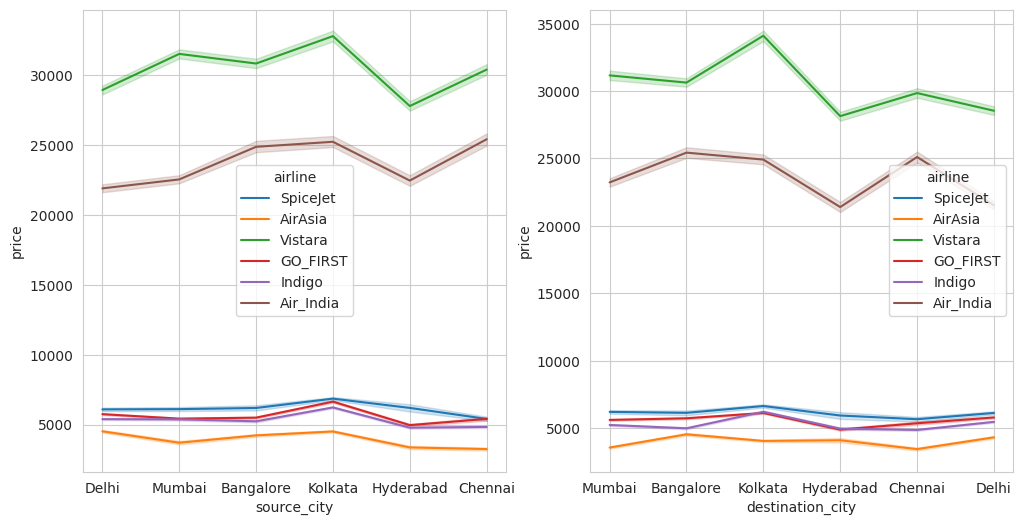

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.lineplot(fdf,x='source_city',y='price',hue='airline')
plt.subplot(1,2,2)
sns.lineplot(fdf,x='destination_city',y='price',hue='airline')

**How does the ticket price vary between Economy and Business class?**

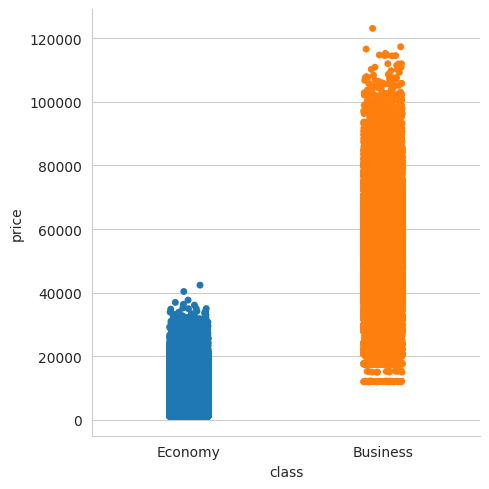

In [ ]:
sns.catplot(fdf,x='class',y='price',hue='class')

<Axes: xlabel='class', ylabel='price'>

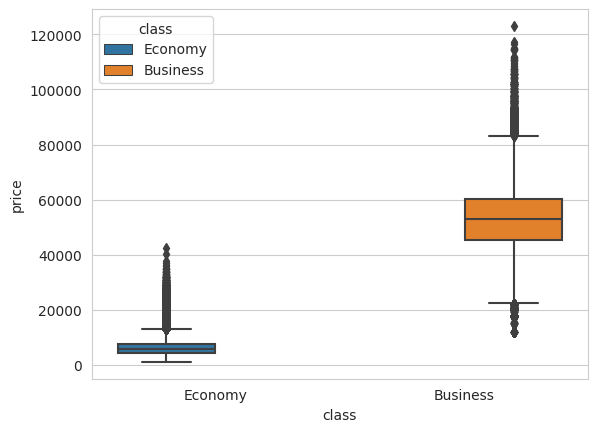

In [ ]:
sns.boxplot(fdf,x='class',y='price',hue='class')

<Axes: xlabel='price', ylabel='Density'>

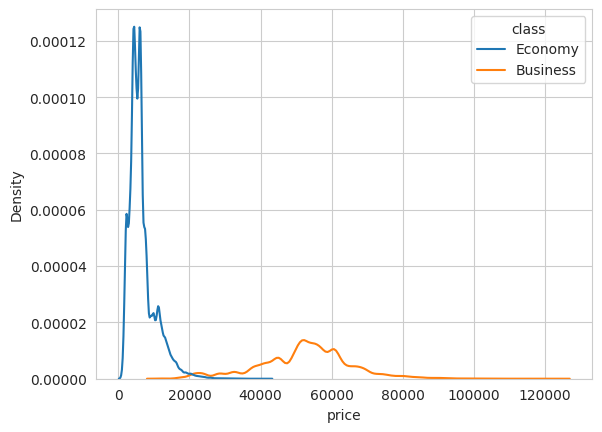

In [ ]:
sns.kdeplot(fdf,x='price',hue='class')